In [25]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import math
from scipy.stats import multivariate_normal

# Exercice 1 - Classification: K-means and the EM algorithm
## 1) K mean

In [54]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_name = iris.feature_names
Y_name = iris.target_names

print(X_name)
print(Y_name)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [55]:
def indicator (X,mu,K):
    n = X.shape[0]
    z = np.zeros((n,K))
    distance = np.zeros((n,K))
    for i in range(n):
        for k in range(K):
            distance[i,k] =  np.linalg.norm(X[i,:]-mu[k,:],2)
    for i in range(n):
        z[i,np.argmin(distance[i,:])]=1
    return(z)

def center(X,z,K):
    mu = np.zeros((K,X.shape[1]))
    n = X.shape[0]
    for k in range(K):
        denominateur = 0
        for i in range(n):
            mu[k,:] += z[i,k] * X[i,:]
            denominateur += z[i,k]
        if (denominateur != 0 ):
            mu[k,:] = mu[k,:] / denominateur
        if (mu[k,:].all() == 0):
            mu[k,:] = X[int(np.random.rand(1)*X.shape[0]),:]
    return(mu)

def distorsion(X,mu,z,K):
    n = X.shape[0]
    J = 0
    for i in range(n):
        for k in range(K):
            J += z[i,k] * np.linalg.norm(X[i,:] - mu[k,:],2)
    return J

In [56]:
def Kmeans(X,K,maxiter=100,tol=1e-5):
    dim = X.shape[1]
    n = X.shape[0]
    mu = np.random.rand(K,dim)
    z = np.zeros((n,K))
    niter = 0
    J = math.inf
    distor = []
    for t in range(maxiter):
        niter+=1
        z = indicator(X,mu,K)
        mu = center(X,z,K)
        new_J = pow(distorsion(X,mu,z,K),2)
        distor.append(new_J)
        if ( abs(new_J-J) < tol):
            J = new_J
            break
        J = new_J
    print("Number of iterations in K means: ", niter)
    return (mu,distor)

Number of iterations in K means:  12
For K =  3 
 mu :
 [[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Distorsion :  [85036.54028653176, 10510.656936553849, 9761.936587586579, 9647.933997463275, 9607.7381302754, 9555.948299011654, 9510.15191291009, 9485.276181147898, 9458.100704274982, 9430.525020342886, 9452.675158653794, 9452.675158653794]


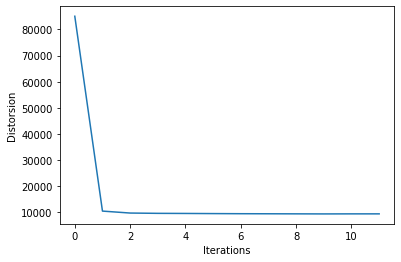

In [57]:
K = 3
mu,distor=Kmeans(X,K)
print("For K = ", K ,"\n mu :\n" ,mu)
print("Distorsion : ",distor)
plt.plot(distor)
plt.xlabel("Iterations")
plt.ylabel("Distorsion")
plt.show()

0 1


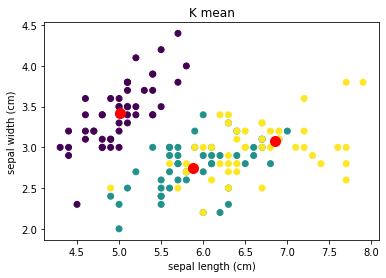

0 2


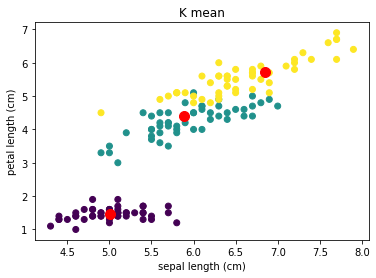

0 3


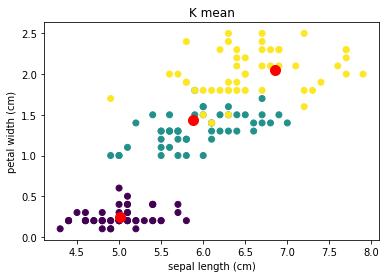

1 2


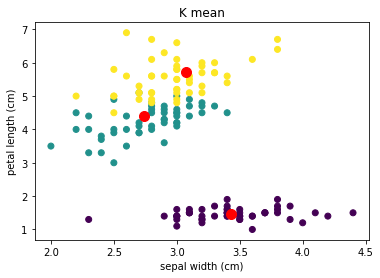

1 3


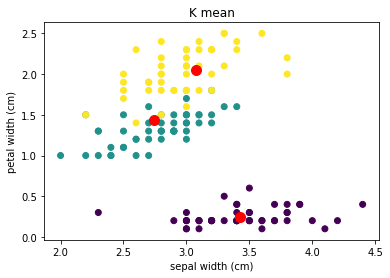

2 3


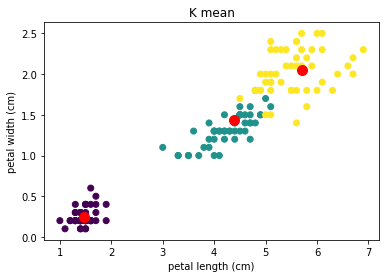

In [58]:
for indice_1 in range(4):
    for indice_2 in range(indice_1+1,4):
        print(indice_1,indice_2)

        plt.scatter(X[:,indice_1], X[:, indice_2], c=Y)
        for k in range(K):
            plt.scatter(mu[k,indice_1],mu[k,indice_2],c='red',marker='o',s=100)
        plt.xlabel(X_name[indice_1])
        plt.ylabel(X_name[indice_2])
        plt.title("K mean")
        plt.show()


## 2) EM

In [59]:
def Estep(X,p,mu,sigma,K,n):#Conditopnal probability of Z given X
    tau = np.zeros((n,K))
    for i in range(n):
        sum = 0
        for k in range(K):
            temp = p[k] * multivariate_normal.pdf(X[i,:], mu[k,:],sigma[k])
            tau[i,k] = temp
            sum += temp
        tau[i,:] = tau[i,:] /sum
    return(tau)

def Mstep(X,tau,K,n):#Maximization Step
    dim = X.shape[1]
    p = np.zeros(K)
    mu = np.zeros((K,dim))
    sigma = [] # Sigma in R(K x dim x dim), set to identity
    for k in range(K):
        sigma.append(np.identity(dim))
    for k in range(K):
        p[k] = sum(tau[:,k])/n
        for i in range(n):
            mu[k,:] += tau[i,k] * X[i,:]
        mu[k,:] = mu[k,:] /sum(tau[:,k])
        sigma[k] = sigma[k]*0
        for i in range(n):
            sigma[k] += tau[i,k] * np.outer((X[i,:] - mu[k,:]),(X[i,:] - mu[k,:]).T)
        sigma[k] = sigma[k] / sum(tau[:,k])
    return(p,mu,sigma)   

In [60]:
def EM(X,K,maxiter=50,tol=1e-3):
    n = X.shape[0] #Number of observations
    dim = X.shape[1] #Dimensions
    p = np.ones(K)/K #Initialization of theta
    mu,distor = Kmeans(X,K) #Initialization with Kmeans
    sigma = [] #Sigma in R(K x dim x dim)
    for k in range(K):
        sigma.append(np.identity(dim))
    for t in range(maxiter):
        tau = Estep(X,p,mu,sigma,K,n)
        p,mu,sigma=Mstep(X,tau,K,n)
        if ( (t == 0) and (dim == 2)):
            break
    return (p,mu,sigma)

In [61]:
K=3
p,muEM,sigmaEM=EM(X,K)
print("p :\n",p)
print("mu : \n",muEM)
for k in range(K):
    print("sigma[",k,"]:\n", sigmaEM[k])

Number of iterations in K means:  12
p :
 [0.36747348 0.33333333 0.29919319]
mu : 
 [[6.54454865 2.94866115 5.47955343 1.98460495]
 [5.006      3.428      1.462      0.246     ]
 [5.91496959 2.77784365 4.20155323 1.29696685]]
sigma[ 0 ]:
 [[0.38704429 0.09220792 0.30281173 0.06165105]
 [0.09220792 0.1103377  0.08428758 0.0560115 ]
 [0.30281173 0.08428758 0.32779736 0.07453004]
 [0.06165105 0.0560115  0.07453004 0.08579773]]
sigma[ 1 ]:
 [[0.121764 0.097232 0.016028 0.010124]
 [0.097232 0.140816 0.011464 0.009112]
 [0.016028 0.011464 0.029556 0.005948]
 [0.010124 0.009112 0.005948 0.010884]]
sigma[ 2 ]:
 [[0.27531878 0.09694138 0.18466239 0.05439074]
 [0.09694138 0.09264604 0.09114317 0.04299735]
 [0.18466239 0.09114317 0.20063041 0.06097847]
 [0.05439074 0.04299735 0.06097847 0.03199695]]


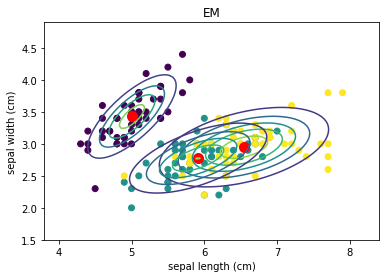

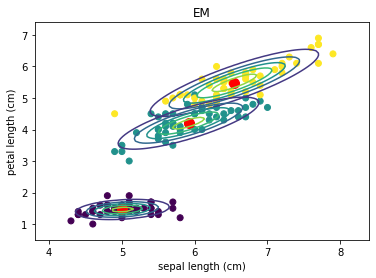

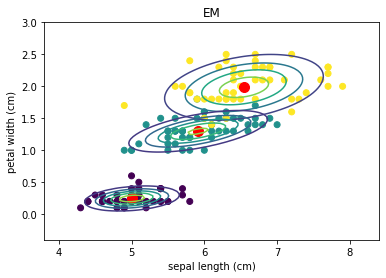

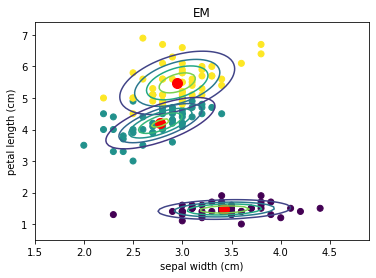

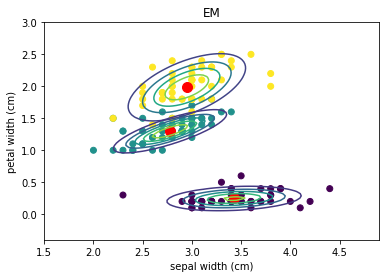

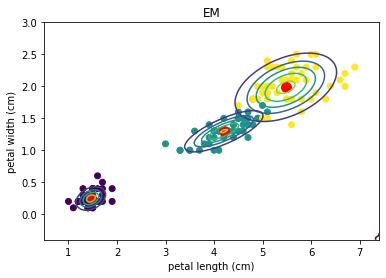

In [62]:
for indice_1 in range(4):
    for indice_2 in range(indice_1+1,4):

        plt.scatter(X[:,indice_1], X[:, indice_2], c=Y)

        x1=np.linspace(min(X[:,indice_1])-0.5,max(X[:,indice_1])+0.5,100)
        x2=np.linspace(min(X[:,indice_2])-0.5,max(X[:,indice_2])+0.5,100)
        x1, x2 = np.meshgrid(x1, x2)


        for k in range(K):
            temp = sigmaEM[k][[indice_1,indice_2],:]
            cov = temp[:,[indice_1,indice_2]]
            #ploting the centroids
            plt.scatter(muEM[k,indice_1],muEM[k,indice_2],c='red',marker='o',s=100)
            z = np.array([[multivariate_normal.pdf([x1[i, j],x2[i ,j]], muEM[k][[indice_1,indice_2]],cov) for j in range(len(x2))] 
            for i in range(len(x1))], dtype='float64')
            #plotting Gaussian ellipses
            plt.contour(x1,x2,z,5)

        plt.xlabel(X_name[indice_1])
        plt.ylabel(X_name[indice_2])
        plt.title("EM")
        plt.show()

## Limite case K mean

In [63]:
nm = np.concatenate((np.arange(50),np.arange(110,115)))
X_limit = X[nm,2].reshape(55,1)
Y_limit = Y[nm]
size = X_limit.shape[0]
axe = np.zeros(size).reshape(55,1)
X_limit = np.concatenate((X_limit,axe),axis=1)

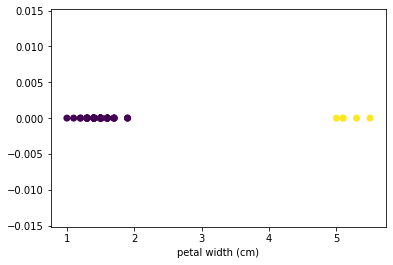

In [64]:
indice_1 = 0
indice_2 = 1

plt.scatter(X_limit[:,indice_1], X_limit[:, indice_2], c=Y_limit)
plt.xlabel(X_name[3])
plt.show()

Number of iterations in K means:  32
mu : 
 [[1.4 0. ]
 [1.5 0. ]]


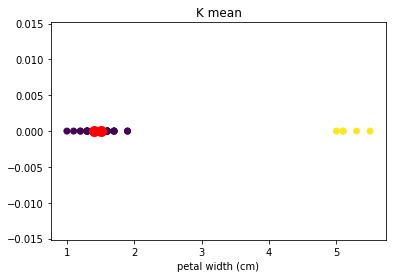

In [65]:
K = 2
mu,distor=Kmeans(X_limit,K)
print("mu : \n" ,mu)

indice_1 = 0
indice_2 = 1

plt.scatter(X_limit[:,indice_1], X_limit[:, indice_2], c=Y_limit)
for k in range(K):
    plt.scatter(mu[k,indice_1],mu[k,indice_2],c='red',marker='o',s=100)
plt.xlabel(X_name[3])
plt.title("K mean")
plt.show()


Number of iterations in K means:  4
muEM : 
, [[1.8593653  0.        ]
 [1.74223385 0.        ]]


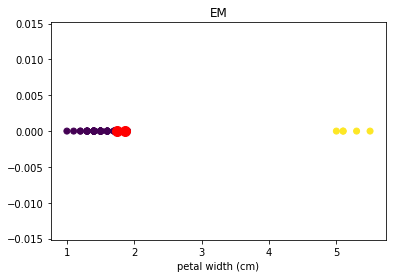

In [66]:
K = 2
p,muEM,sigmaEM=EM(X_limit,K)
print("muEM : \n,",muEM)
indice_1 = 0
indice_2 = 1

plt.scatter(X_limit[:,indice_1], X_limit[:, indice_2], c=Y_limit)
for k in range(K):
    plt.scatter(muEM[k,indice_1],muEM[k,indice_2],c='red',marker='o',s=100)
plt.xlabel(X_name[3])
plt.title("EM")
plt.show()